In [1]:
import sklearn
from sklearn.datasets import make_blobs
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator
from matplotlib import pyplot as plt
from scipy.stats import multivariate_normal

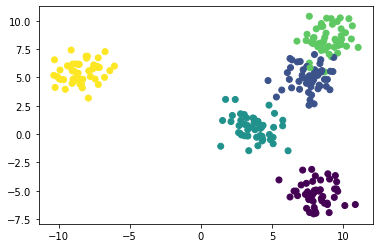

In [2]:
X, y = make_blobs(n_samples=240, n_features=2, centers=5, random_state=150, cluster_std=1)
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [3]:
class EM(BaseEstimator):
    
    def __init__(self, n_clusters=1, max_iter=300, covariance_type="full"):
        self.clusters = n_clusters
        self.max_iter = max_iter
        self.covariance_type = covariance_type
    
    def fit(self, X):
    
        """ Задаём начальное приближение """
        
        self.cl_weight = np.repeat(1 / self.clusters, repeats=self.clusters).reshape(-1, self.clusters)
        
        # first way
        
        # self.means = np.array([col.mean(axis=0) for col in __dataset])
        # self.std = np.array([np.diagflat(col.std(axis=0) ** 2) for col in __dataset])
        
        # second way
        
        idx_mean = np.random.randint(low=0, high=X.shape[0], size=self.clusters)
        self.means = X[idx_mean]
        self.std = np.array([np.cov(X.T) for _ in range(self.clusters)])
            
    def predict(self, X):
        
        for iter in range(self.max_iter):
            # E-step (updating hidden variables)
            # print(self.cl_weight)

            X_gaussian_probs = []
            
            for cluster in range(self.clusters):
                
                density = multivariate_normal(mean=self.means[cluster], cov=self.std[cluster])
                X_gaussian_probs.append(density.pdf(X))
            
            X_gaussian_probs = np.array(X_gaussian_probs).T
            weighted_X_gaussian_probs = self.cl_weight * X_gaussian_probs
            G = weighted_X_gaussian_probs / weighted_X_gaussian_probs.sum(axis=1).reshape(-1, 1)
            self.labels = np.argmax(G, axis=1)  
    
           # M-step (updating parameters)

            # means
            
            for i in range(self.clusters):
                
                self.means[i] = (G[:, i].reshape(-1, 1) * X).sum(axis=0) / (self.cl_weight[0][i] * X.shape[0])
            
            # self.means /= (X.shape[0] * self.cl_weight.T)
            
            # covariance matrixes
            
            
            for i in range(self.clusters):
            
                if self.covariance_type == "full":
                    self.std[i] = np.cov(X.T, aweights=G[:, i] / (X.shape[0] * self.cl_weight[0][i]), bias=True, ddof=0)
                elif self.covariance_type == "diag":
                    self.std[i] = np.diagflat((1 / (X.shape[0] * self.cl_weight[0][i])) * ((G[:, i].reshape(-1, 1) * (X - self.means[i]) ** 2).sum(axis=0)))

                
            # weights of clusters
            
            self.cl_weight = G.sum(axis=0).reshape(-1, self.clusters) / X.shape[0]
                                          
            # self.cl_weight = G.sum(axis=0).reshape(-1, self.clusters) / X.shape[0]
            
        
    

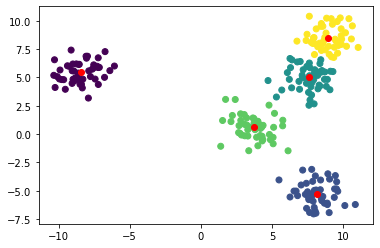

In [4]:
em = EM(n_clusters=5, covariance_type="diag")
em.fit(X)
em.predict(X)
plt.scatter(X[:,0], X[:,1], c=em.labels)
plt.scatter(*em.means[0], c="red")
plt.scatter(*em.means[1], c="red")
plt.scatter(*em.means[2], c="red")
plt.scatter(*em.means[3], c="red")
plt.scatter(*em.means[4], c="red")
# plt.scatter(*em.means[5], c="red")
# plt.scatter(*em.means[6], c="red")
# plt.scatter(*em.means[7], c="red")
# plt.scatter(*em.means[8], c="red")
# plt.scatter(*em.means[9], c="red")

In [5]:
from sklearn.mixture import GaussianMixture

In [6]:
model = GaussianMixture(n_components=5, covariance_type="diag")

In [7]:
model.fit(X)

GaussianMixture(covariance_type='diag', n_components=5)

In [8]:
Y = model.predict(X) 

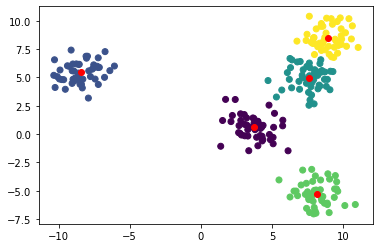

In [9]:
model.fit(X)
Y = model.predict(X) 

plt.scatter(X[:,0], X[:,1], c=Y)
plt.scatter(*model.means_[0], c="red")
plt.scatter(*model.means_[1], c="red")
plt.scatter(*model.means_[2], c="red")
plt.scatter(*model.means_[3], c="red")
plt.scatter(*model.means_[4], c="red")
# plt.scatter(*model.means_[5], c="red")
# plt.scatter(*model.means_[6], c="red")
# plt.scatter(*model.means_[7], c="red")
# plt.scatter(*model.means_[8], c="red")
# plt.scatter(*model.means_[9], c="red")
# plt.scatter(*model.means_[5], c="red")
# plt.scatter(*em.means[6], c="red")

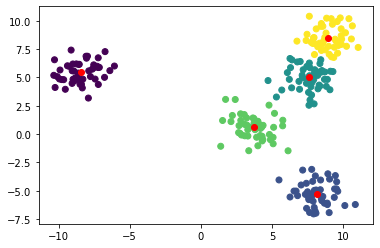

In [10]:
plt.scatter(X[:,0], X[:,1], c=em.labels)
plt.scatter(*em.means[0], c="red")
plt.scatter(*em.means[1], c="red")
plt.scatter(*em.means[2], c="red")
plt.scatter(*em.means[3], c="red")
plt.scatter(*em.means[4], c="red")
# plt.scatter(*em.means[5], c="red")
# plt.scatter(*em.means[6], c="red")
# plt.scatter(*em.means[7], c="red")
# plt.scatter(*em.means[8], c="red")
# plt.scatter(*em.means[9], c="red")